In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('C:\\Users\\paart\\Downloads\\archive (3)\\Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df = df.drop(['User ID'],axis=1)

In [7]:
df.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
enc = LabelEncoder()
df['Gender'] = enc.fit_transform(df['Gender'])

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   
variables = df[['Gender','EstimatedSalary','Age']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,1.783132,Gender
1,4.601775,EstimatedSalary
2,5.122407,Age


In [12]:
x = df.drop(labels=['Purchased'], axis=1)
y = df['Purchased']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = 10)

In [14]:
x_train.shape, x_test.shape

((300, 3), (100, 3))

In [15]:
logr = LogisticRegression()
logr.fit(x_train,y_train)

LogisticRegression()

In [16]:
logr.score(x_test,y_test)

0.69

In [17]:
y_pred = logr.predict(x_test)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

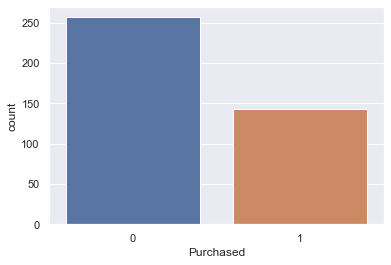

In [19]:
sns.countplot(x='Purchased',data=df)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test,y_pred)

array([[69,  0],
       [31,  0]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report as cr

print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        69
           1       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



C:\Users\paart\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paart\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paart\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
logr.predict_proba(x_test)

array([[0.53111258, 0.46888742],
       [0.53397603, 0.46602397],
       [0.54302799, 0.45697201],
       [0.52251067, 0.47748933],
       [0.52298894, 0.47701106],
       [0.51102154, 0.48897846],
       [0.52011866, 0.47988134],
       [0.52059714, 0.47940286],
       [0.52824707, 0.47175293],
       [0.53397603, 0.46602397],
       [0.52824707, 0.47175293],
       [0.55631439, 0.44368561],
       [0.56198514, 0.43801486],
       [0.51245857, 0.48754143],
       [0.51102153, 0.48897847],
       [0.53397603, 0.46602397],
       [0.54160046, 0.45839954],
       [0.5277693 , 0.4722307 ],
       [0.50718863, 0.49281137],
       [0.55820635, 0.44179365],
       [0.52585772, 0.47414228],
       [0.53445305, 0.46554695],
       [0.53588377, 0.46411623],
       [0.54207639, 0.45792361],
       [0.52251067, 0.47748933],
       [0.52633569, 0.47366431],
       [0.52824707, 0.47175293],
       [0.56952074, 0.43047926],
       [0.51581079, 0.48418921],
       [0.51581078, 0.48418922],
       [0.

In [24]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.65  , 0.65  , 0.6375, 0.8125, 0.625 ])